# De novo design

### Developers: Mat Bieniek, Ben Cree, Rachael Pirie, Josh Horton

* Add R-groups in user-defined positions
* Output ADMET properties
* Perform constrained optimisation
* Score poses
* Send output to free energy calculations

Open source, customisable, fast/easy to use.

In [1]:
import copy
import glob
import prody
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
from rgroup import RMol, RList, build_molecules, fix_receptor, optimise_in_receptor, RGroups, sort_conformers, ic50

<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.


In [2]:
%cd /home/c0065492/rgroups/dat/bace_hunt/18jan

/home/c0065492/rgroups/dat/bace_hunt/18jan


In [3]:
prefix = 'lig_' #to extract experimental data from ligands.yml

In [4]:
!wget -nc https://files.rcsb.org/download/4JPC.pdb
pdb = '4JPC.pdb'

File ‘4JPC.pdb’ already there; not retrieving.



In [5]:
RMol.set_gnina(loc='/home/c0065492/software/gnina')

In [6]:
# load the complex with the ligand
sys = prody.parsePDB(pdb)
#sys = prody.parsePDB('jnk1/2gmx.pdb')

rec = sys.select('not (nucleic or hetatm) and not water')
#mol = sys.select('resname 19H and chain A')
mol = sys.select('resname 0X5')

prody.writePDB('rec.pdb', rec)
#prody.writePDB('lig.pdb', mol)

@> 3509 atoms and 1 coordinate set(s) were parsed in 0.04s.


'rec.pdb'

In [7]:
#!wget 'https://models.rcsb.org/v1/5nev/ligand?auth_seq_id=301&label_asym_id=E&encoding=sdf&filename=5nev_E_72L.sdf' -O lig.sdf
#!obabel jnk1/core.sdf -O jnk1/coreh.sdf -p 7
!obabel -isdf core.sdf -osdf -O coreh.sdf -p 7
# ^manually modify the files if need be
%pwd

1 molecule converted


'/home/c0065492/rgroups/dat/bace_hunt/18jan'

In [8]:
# load the ligand
# rdkit doesn't do a good job with protonation, 
#init_mol = Chem.MolFromPDBFile('lig.pdb', removeHs=False)
#init_mol = Chem.AddHs(init_mol, addCoords=True)

init_mol = Chem.SDMolSupplier('coreh.sdf', removeHs=False)[0]

# get the R group representation of the rdkit Mol
rinit_mol = RMol(init_mol)

###### select the atom to be replaced with the R group
rinit_mol.rep2D(idx=True, size=(500, 500))

In [10]:
#remove 44 since all conformers clash with protein
ligand_ids = list(range(11,42))

In [11]:
#ligand_ids = ['13c', '13d', '13h', '17c', '17h']
# read the rgroups 1 by 1 in a loop
#ligand_idss that there is only one -r.mol in each dir
rgroups = [Chem.MolFromMolFile(glob.glob(f'{ligand_id}/*.mol')[0], removeHs=False) for ligand_id in ligand_ids]
rgroups

In [12]:
# build a list of molecules
attachment_index = [19]
rmols = build_molecules(rinit_mol, attachment_index, rgroups)

Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f8f58ac6100> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f8f58acc040>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f8f58ac6160> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f8f58acd040>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f8f58ac6100> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f8f58ace040>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f8f58ac6160> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f8f58ace220>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f8f58ac6100> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f8f58ace040>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f8f58ac6160> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f8f58ace220>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f8f58ac6100> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f8f58ace040>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom o

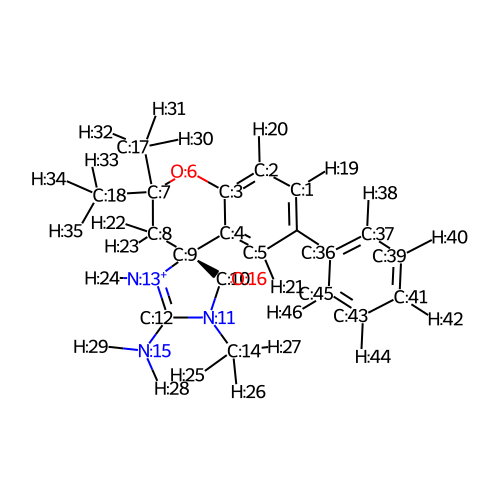

In [13]:
rmols[0].rep2D(idx=True, size=(500, 500))

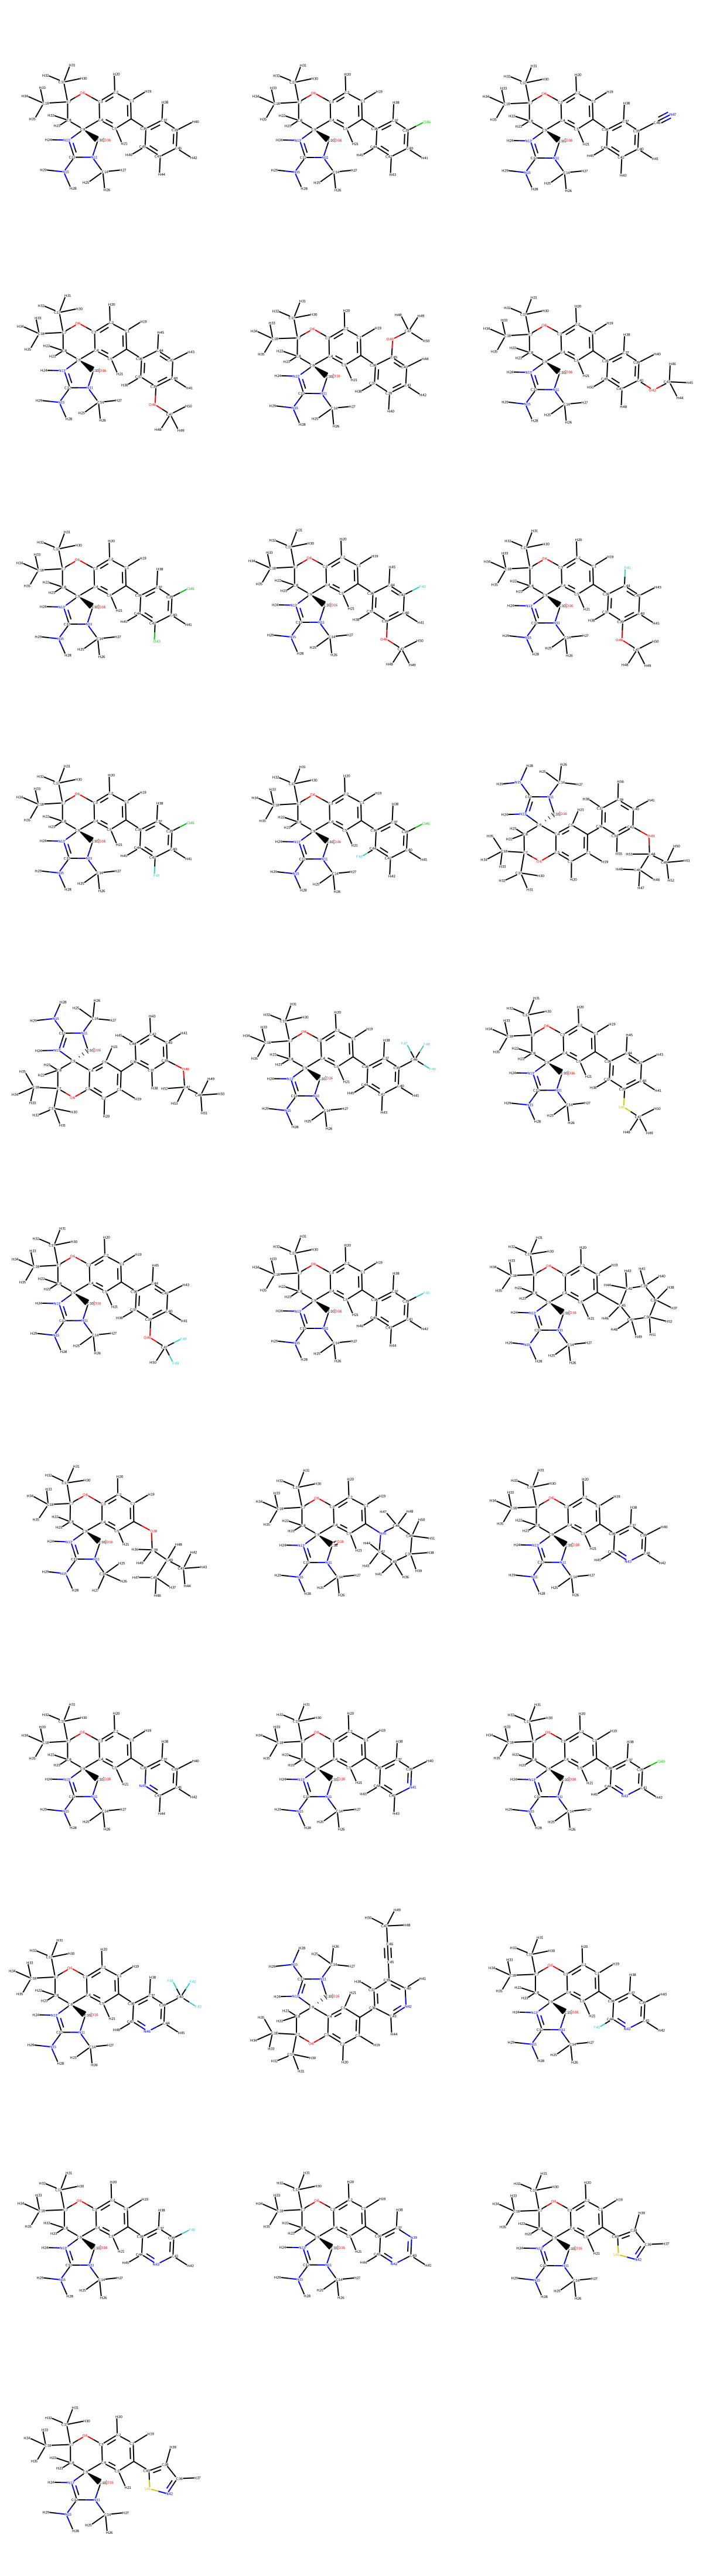

In [14]:
rmols.rep2D()

In [15]:
rmols[3].rep3D()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [16]:
rmols.toxicity()

,MW,HBA,HBD,LogP,Pass_Ro5,has_pains,has_unwanted_subs,has_prob_fgs,synthetic_accessibility
0,336.170653,3,2,0.97730,True,False,False,False,8.120829
0,370.131681,3,2,1.63070,True,False,False,False,7.937033
0,361.165902,4,2,0.84898,True,False,False,False,7.871652
0,366.181218,4,2,0.98590,True,False,False,False,8.188716
0,366.181218,4,2,0.98590,True,False,False,False,8.188716
0,366.181218,4,2,0.98590,True,False,False,False,8.188716
0,404.092709,3,2,2.28410,True,False,False,False,7.711674
0,384.171796,4,2,1.12500,True,False,False,False,8.034630
0,384.171796,4,2,1.12500,True,False,False,False,8.034630
0,388.122259,3,2,1.76980,True,False,False,False,7.714845


In [17]:
rmols.generate_conformers(num_conf=200,
                         minimum_conf_rms=0.5,
                         #flexible = [16, 17, 18, 27]
                         )

RMol index 0
removed 197 duplicated conformations
RMol index 1
removed 197 duplicated conformations
RMol index 2
removed 195 duplicated conformations
RMol index 3
removed 190 duplicated conformations
RMol index 4
removed 192 duplicated conformations
RMol index 5
removed 193 duplicated conformations
RMol index 6
removed 197 duplicated conformations
RMol index 7
removed 191 duplicated conformations
RMol index 8
removed 191 duplicated conformations
RMol index 9
removed 197 duplicated conformations
RMol index 10
removed 196 duplicated conformations
RMol index 11
removed 115 duplicated conformations
RMol index 12
removed 161 duplicated conformations
RMol index 13
removed 190 duplicated conformations
RMol index 14
removed 192 duplicated conformations
RMol index 15
removed 184 duplicated conformations
RMol index 16
removed 197 duplicated conformations
RMol index 17
removed 138 duplicated conformations
RMol index 18
removed 80 duplicated conformations
RMol index 19
removed 145 duplicated confo

In [18]:
#rmol.rep3D(template=True)

In [19]:
rmols.GetNumConformers()

[4,
 4,
 6,
 11,
 9,
 8,
 4,
 10,
 10,
 4,
 5,
 86,
 40,
 11,
 9,
 17,
 4,
 63,
 121,
 56,
 4,
 5,
 4,
 4,
 10,
 9,
 4,
 4,
 4,
 5,
 5]

### Optimise conformers in context of protein

In [20]:
# fix the receptor file 
fix_receptor("rec.pdb", "rec_h.pdb")
# load back into prody
rec_fix = prody.parsePDB("rec_h.pdb")

@> 6220 atoms and 1 coordinate set(s) were parsed in 0.06s.


In [21]:
# filter by the protein clashes
rmols[2].rep3D(prody=rec_fix)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [22]:
rmols.removeConfsClashingWithProdyProt(rec_fix)

RMol index 0
RMol index 1
RMol index 2
Clash with the protein. Removing conformer id: 1
RMol index 3
Clash with the protein. Removing conformer id: 10
Clash with the protein. Removing conformer id: 8
Clash with the protein. Removing conformer id: 6
Clash with the protein. Removing conformer id: 5
Clash with the protein. Removing conformer id: 4
Clash with the protein. Removing conformer id: 3
RMol index 4
Clash with the protein. Removing conformer id: 5
Clash with the protein. Removing conformer id: 4
Clash with the protein. Removing conformer id: 3
Clash with the protein. Removing conformer id: 0
RMol index 5
Clash with the protein. Removing conformer id: 5
Clash with the protein. Removing conformer id: 3
Clash with the protein. Removing conformer id: 1
Clash with the protein. Removing conformer id: 0
RMol index 6
RMol index 7
Clash with the protein. Removing conformer id: 9
Clash with the protein. Removing conformer id: 8
Clash with the protein. Removing conformer id: 7
Clash with th

In [23]:
rmols.GetNumConformers()

[4,
 4,
 5,
 5,
 5,
 4,
 4,
 5,
 5,
 4,
 4,
 8,
 14,
 7,
 4,
 10,
 4,
 46,
 69,
 55,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 5,
 5]

In [24]:
rmols[2].rep3D(prody=rec_fix)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [25]:
# opt_mol, energies 
energies = rmols.optimise_in_receptor(
    receptor_file="rec_h.pdb", 
    ligand_force_field="openff", 
    use_ani=True,
    sigma_scale_factor=0.8,
    relative_permittivity=4
)

RMol index 0


Optimising conformer: 100%|███████████████████████| 4/4 [00:20<00:00,  5.17s/it]


RMol index 1


Optimising conformer: 100%|███████████████████████| 4/4 [00:32<00:00,  8.17s/it]


RMol index 2


Optimising conformer: 100%|███████████████████████| 5/5 [00:47<00:00,  9.58s/it]


RMol index 3


Optimising conformer: 100%|███████████████████████| 5/5 [00:36<00:00,  7.24s/it]


RMol index 4


Optimising conformer: 100%|███████████████████████| 5/5 [00:40<00:00,  8.07s/it]


RMol index 5


Optimising conformer: 100%|███████████████████████| 4/4 [00:34<00:00,  8.63s/it]


RMol index 6


Optimising conformer: 100%|███████████████████████| 4/4 [00:38<00:00,  9.72s/it]


RMol index 7


Optimising conformer: 100%|███████████████████████| 5/5 [00:44<00:00,  8.82s/it]


RMol index 8


Optimising conformer: 100%|███████████████████████| 5/5 [00:34<00:00,  6.90s/it]


RMol index 9


Optimising conformer: 100%|███████████████████████| 4/4 [00:32<00:00,  8.13s/it]


RMol index 10


Optimising conformer: 100%|███████████████████████| 4/4 [00:31<00:00,  7.94s/it]


RMol index 11


Optimising conformer: 100%|███████████████████████| 8/8 [01:12<00:00,  9.03s/it]


RMol index 12


Optimising conformer: 100%|█████████████████████| 14/14 [02:05<00:00,  8.94s/it]


RMol index 13


Optimising conformer: 100%|███████████████████████| 7/7 [01:31<00:00, 13.05s/it]


RMol index 14


Optimising conformer: 100%|███████████████████████| 4/4 [00:21<00:00,  5.46s/it]


RMol index 15


Optimising conformer: 100%|█████████████████████| 10/10 [01:12<00:00,  7.22s/it]


RMol index 16


Optimising conformer: 100%|███████████████████████| 4/4 [00:19<00:00,  4.99s/it]


RMol index 17


Optimising conformer: 100%|█████████████████████| 46/46 [05:13<00:00,  6.80s/it]


RMol index 18


Optimising conformer: 100%|█████████████████████| 69/69 [09:15<00:00,  8.05s/it]


RMol index 19


Optimising conformer: 100%|█████████████████████| 55/55 [04:39<00:00,  5.08s/it]


RMol index 20


Optimising conformer: 100%|███████████████████████| 4/4 [00:22<00:00,  5.54s/it]


RMol index 21


Optimising conformer: 100%|███████████████████████| 4/4 [00:24<00:00,  6.09s/it]


RMol index 22


Optimising conformer: 100%|███████████████████████| 4/4 [00:20<00:00,  5.08s/it]


RMol index 23


Optimising conformer: 100%|███████████████████████| 4/4 [00:31<00:00,  7.94s/it]


RMol index 24


Optimising conformer: 100%|███████████████████████| 5/5 [00:33<00:00,  6.78s/it]


RMol index 25


Optimising conformer: 100%|███████████████████████| 5/5 [00:29<00:00,  5.86s/it]


RMol index 26


Optimising conformer: 100%|███████████████████████| 4/4 [00:19<00:00,  4.90s/it]


RMol index 27


Optimising conformer: 100%|███████████████████████| 4/4 [00:20<00:00,  5.19s/it]


RMol index 28


Optimising conformer: 100%|███████████████████████| 4/4 [00:14<00:00,  3.69s/it]


RMol index 29


Optimising conformer: 100%|███████████████████████| 5/5 [00:34<00:00,  6.87s/it]


RMol index 30


Optimising conformer: 100%|███████████████████████| 5/5 [00:36<00:00,  7.29s/it]


In [26]:
rmols[0].rep3D()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [27]:
for i in range(len(ligand_ids)):
    rmols[i].to_file("optimised_coords_" + str(ligand_ids[i]) + ".pdb")

In [28]:
final_energies = rmols.sort_conformers(energy_range=5)

RMol index 0
RMol index 1
RMol index 2
RMol index 3
RMol index 4
RMol index 5
RMol index 6
RMol index 7
RMol index 8
RMol index 9
RMol index 10
RMol index 11
RMol index 12
RMol index 13
RMol index 14
RMol index 15
RMol index 16
RMol index 17
RMol index 18
RMol index 19
RMol index 20
RMol index 21
RMol index 22
RMol index 23
RMol index 24
RMol index 25
RMol index 26
RMol index 27
RMol index 28
RMol index 29
RMol index 30


In [29]:
len(ligand_ids) == len(rmols) #check theyre equal or very bad and silent things happen

In [17]:
final_energies[2]

[0.0, 1.0066670740197878, 3.2105085168077494, 4.37898442785081]

In [30]:
for i in range(len(ligand_ids)):
    rmols[i].to_file("best_conformers_" + str(ligand_ids[i]) + ".pdb")

In [31]:
CNNscores = rmols.gnina(receptor_file="rec_h.pdb") 

RMol index 0
RMol index 1
RMol index 2
RMol index 3
RMol index 4
RMol index 5
RMol index 6
RMol index 7
RMol index 8
RMol index 9
RMol index 10
RMol index 11
RMol index 12
RMol index 13
RMol index 14
RMol index 15
RMol index 16
RMol index 17
RMol index 18
RMol index 19
RMol index 20
RMol index 21
RMol index 22
RMol index 23
RMol index 24
RMol index 25
RMol index 26
RMol index 27
RMol index 28
RMol index 29
RMol index 30


In [13]:
CNNscores

[[6.64956, 6.6499, 6.63835, 6.60682],
 [6.83058, 6.75568, 6.82148, 6.17542],
 [6.68979, 6.54566, 6.55029, 6.64564],
 [6.57145, 6.36466, 6.5118, 6.59709, 6.73778],
 [5.74776, 6.67817, 6.73802, 6.75252, 6.72189],
 [6.43187, 6.46727, 6.46774],
 [6.90383, 6.90382, 6.26224, 6.38689],
 [5.89164, 6.53157, 6.65875, 6.58416, 6.49076],
 [6.67505, 6.67306, 6.46588],
 [6.25126, 6.84663, 6.8921],
 [6.92734, 6.72243, 6.2543, 6.8603],
 [6.44728, 6.44719, 6.44712, 6.44709, 6.73641, 6.73625],
 [6.08415,
  6.0875,
  6.63577,
  6.62674,
  6.62647,
  6.43711,
  6.43737,
  6.44021,
  6.44647,
  6.75123,
  6.77272],
 [6.49897, 6.49922, 6.49967, 6.66106, 6.53465, 6.61526, 6.43549],
 [6.59356, 6.61222, 6.56466],
 [6.76902, 6.45652, 6.44842, 6.433, 6.60324],
 [6.78046, 6.70812, 6.76435, 6.45117],
 [6.04328,
  6.88001,
  6.88001,
  6.88003,
  6.88004,
  6.88006,
  6.11478,
  6.61822,
  6.61753,
  6.61753,
  6.61749,
  6.61749,
  6.23087,
  6.59775],
 [5.54899,
  6.26839,
  6.03318,
  6.0329,
  6.033,
  6.03299,

In [32]:
for i in range(len(ligand_ids)):
    rmols[i].to_file("best_conformers_" + str(ligand_ids[i]) + ".pdb")

In [33]:
ic50_scores = []
for i in range(len(CNNscores)):
    ic50_scores.append([ic50(x) for x in CNNscores[i]])

In [34]:
for i in range(len(ic50_scores)):
    with open('scores_' + str(ligand_ids[i]) + '.dat', 'w') as f:
        for x in range(len(ic50_scores[i])):
            f.write(str(ic50_scores[i][x])+'\n')

In [35]:
lowest = []
for i in range(len(ic50_scores)):
    lowest.append(ic50_scores[i][0])

In [4]:
import yaml
with open("ligands.yml", "r") as stream:
    try:
        data = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

experimental = []
for i in range(len(ligand_ids)):
    if data[prefix + str(ligand_ids[i])]['measurement']['unit'] == 'nM':
        print('found nM')
        experimental.append(data[prefix+ str(ligand_ids[i])]['measurement']['value'])
    elif data[prefix + str(ligand_ids[i])]['measurement']['unit'] == 'um':
        experimental.append(1000*data[prefix+ str(ligand_ids[i])]['measurement']['value'])
    else:
        print('UNKNOWN UNIT - SKIPPING')
experimental 

found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM
found nM


[455,
 24,
 94,
 68,
 1701,
 7197,
 28,
 61,
 60,
 39,
 36,
 2864,
 70,
 74,
 344,
 28,
 99,
 278,
 431,
 8661,
 113,
 2363,
 6270,
 34,
 63,
 10,
 130,
 145,
 151,
 501,
 230]

In [5]:
data[prefix + str(ligand_ids[0])]['measurement']['unit']

'nM'

In [6]:
import dill
%cd ~/rgroups/dat/bace_hunt/18jan
#dill.load_session('bace_hunt_11jan.db') loading data from previous run to create smina graphs

/home/c0065492/rgroups/dat/bace_hunt/18jan


In [7]:
import pandas as pd

name = [ligand_ids[i:i+1] for i in range(0, len(ligand_ids), 1)]
energies = [i[0] for i in final_energies]
cnn = [i[0] for i in CNNscores]
ic50 = [i[0] for i in ic50_scores]
expt = [i for i in experimental]
output = pd.DataFrame({'ID' : name, 'Final energies' : energies, 'Gnina score' : cnn, 'Gnina IC50 / nM' : ic50, 'Experimental IC50 / nM' : expt})
output

,ID,Final energies,Gnina score,Gnina IC50 / nM,Experimental IC50 / nM
0,[11],0.0,6.64956,224.099042,455
1,[12],0.0,6.83058,147.713436,24
2,[13],0.0,6.68979,204.272545,94
3,[14],0.0,6.57145,268.256343,68
4,[15],0.0,5.74776,1787.475097,1701
5,[16],0.0,6.43187,369.938899,7197
6,[17],0.0,6.90383,124.787188,28
7,[18],0.0,5.89164,1283.393986,61
8,[19],0.0,6.67505,211.324573,60
9,[20],0.0,6.25126,560.712193,39


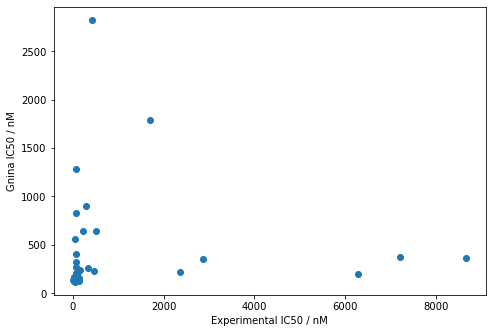

In [8]:
import matplotlib.pyplot as plt
import numpy as np
#ligands 27 & 28 have stereochem issues
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(experimental, lowest) #, color='black', marker='x')
ax.set_xlabel('Experimental IC50 / nM')
ax.set_ylabel('Gnina IC50 / nM')

x = np.linspace(0,25,25)
y = np.linspace(50,350,25)
#ax.plot(x, y, color='black', linestyle='--')

plt.savefig('out.png', bbox_inches='tight')
plt.show()

In [9]:
CNNscores

[[6.64956, 6.6499, 6.63835, 6.60682],
 [6.83058, 6.75568, 6.82148, 6.17542],
 [6.68979, 6.54566, 6.55029, 6.64564],
 [6.57145, 6.36466, 6.5118, 6.59709, 6.73778],
 [5.74776, 6.67817, 6.73802, 6.75252, 6.72189],
 [6.43187, 6.46727, 6.46774],
 [6.90383, 6.90382, 6.26224, 6.38689],
 [5.89164, 6.53157, 6.65875, 6.58416, 6.49076],
 [6.67505, 6.67306, 6.46588],
 [6.25126, 6.84663, 6.8921],
 [6.92734, 6.72243, 6.2543, 6.8603],
 [6.44728, 6.44719, 6.44712, 6.44709, 6.73641, 6.73625],
 [6.08415,
  6.0875,
  6.63577,
  6.62674,
  6.62647,
  6.43711,
  6.43737,
  6.44021,
  6.44647,
  6.75123,
  6.77272],
 [6.49897, 6.49922, 6.49967, 6.66106, 6.53465, 6.61526, 6.43549],
 [6.59356, 6.61222, 6.56466],
 [6.76902, 6.45652, 6.44842, 6.433, 6.60324],
 [6.78046, 6.70812, 6.76435, 6.45117],
 [6.04328,
  6.88001,
  6.88001,
  6.88003,
  6.88004,
  6.88006,
  6.11478,
  6.61822,
  6.61753,
  6.61753,
  6.61749,
  6.61749,
  6.23087,
  6.59775],
 [5.54899,
  6.26839,
  6.03318,
  6.0329,
  6.033,
  6.03299,

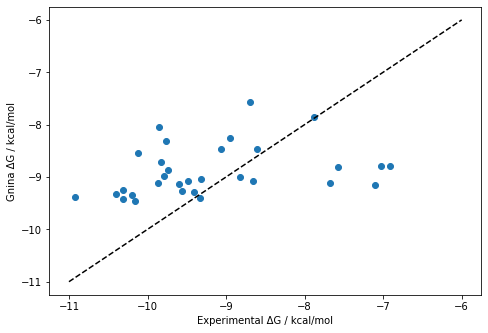

In [10]:
# convert nM to M
lowestinM = [ i * 1e-9 for i in lowest]
exptinM = [ i * 1e-9 for i in expt]

RT = 0.593 # kcal/mol

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

# DG = RTln(K)
ax.scatter(RT*np.log(exptinM), RT*np.log(lowestinM)) #, color='black', marker='x')
ax.set_xlabel('Experimental \u0394G / kcal/mol')
ax.set_ylabel('Gnina \u0394G / kcal/mol')

x = np.linspace(-11,-6,25)
ax.plot(x, x, color='black', linestyle='--')
A = np.vstack([experimental, np.ones(len(experimental))]).T
m, c = np.linalg.lstsq(A, lowest, rcond=None)[0]

#m = "{:.2f}".format(m)
#r = "r^2 =" + str(m)
#plt.annotate(r, (-10,-6))
plt.savefig('deltaG2.png', bbox_inches='tight')
plt.show()

In [11]:
import re
smina_affinities = []
with open('smina_scores.dat', 'r') as f:
    for line in f:
        affinity = re.findall(r'Affinity: (-?\d+.\d+)', str(line))
        try:
            smina_affinities.append(float(affinity[0]))
        except:
            pass

In [12]:
smina_affinities

[-8.75337,
 -8.94538,
 -7.06631,
 10.08359,
 -8.59521,
 6.62516,
 -3.62347,
 -7.01832,
 11.25444,
 -7.20717,
 -2.84655,
 1.22588,
 0.30017,
 -8.36063,
 -6.29614,
 9.1302,
 -8.95231,
 -8.00932,
 -2.02617,
 -8.14462,
 -8.49653,
 -8.26601,
 -8.59642,
 -8.69796,
 12.59138,
 16.3409,
 -7.77309,
 -8.69124,
 -8.48974,
 -7.01367,
 -7.01367]

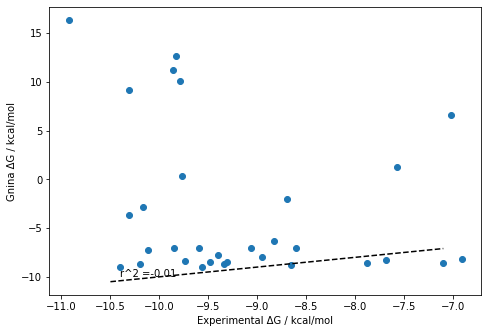

In [15]:
# convert nM to M
lowestinM = [ i * 1e-9 for i in lowest]
exptinM = [ i * 1e-9 for i in expt]

RT = 0.593 # kcal/mol

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

# DG = RTln(K)
ax.scatter(RT*np.log(exptinM), smina_affinities) #, color='black', marker='x')
ax.set_xlabel('Experimental \u0394G / kcal/mol')
ax.set_ylabel('Gnina \u0394G / kcal/mol')

x = np.linspace(-10.5,-7.1,10)
ax.plot(x, x, color='black', linestyle='--')
A = np.vstack([experimental, np.ones(len(experimental))]).T
m, c = np.linalg.lstsq(A, lowest, rcond=None)[0]

m = "{:.2f}".format(m)
r = "r^2 =" + str(m)
plt.annotate(r, (-10.4,-10))
plt.savefig('deltaG2_smina.png', bbox_inches='tight')
plt.show()

In [37]:
import dill
dill.dump_session('bacehunt_18jan.db')

In [3]:
import dill
dill.load_session('bacehunt_18jan.db')